In [11]:
import pandas as pd

file_path = 'cleaned_dataset.csv'
data = pd.read_csv(file_path)

numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
numerical_data = data[numerical_cols]

print(f"Number of samples: {len(data)}")
print(f"Number of features: {len(numerical_cols)}")


Number of samples: 344
Number of features: 4


In [7]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 8.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.0 MB 8.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/11.0 MB 9.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 10.6 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 10.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


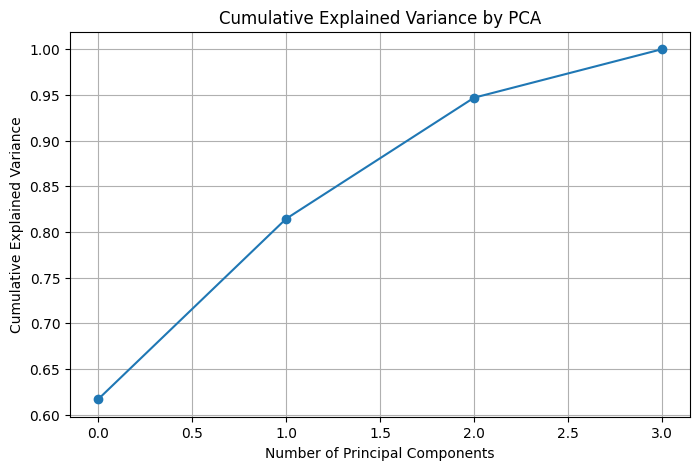

Number of components to retain 95% variance: 4


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

In [13]:
pca_reducer = PCA(n_components=n_components)
reduced_data = pca_reducer.fit_transform(scaled_data)

reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(n_components)])
print("Reduced Data:")
print(reduced_df.head())

output_path = 'reduced_dataset.csv'  
reduced_df.to_csv(output_path, index=False)
print(f"Reduced dataset saved to {output_path}")

Reduced Data:
            PC1           PC2           PC3           PC4
0 -1.826395e+00  1.329330e-01  3.918734e-01 -3.694396e-01
1 -1.280662e+00 -3.734830e-01  2.581225e-01 -3.730074e-01
2 -1.202863e+00 -1.906579e-01 -2.588396e-01  3.089637e-01
3 -4.425842e-16 -2.636658e-16  3.509275e-16 -1.144701e-15
4 -1.796753e+00  4.697583e-02  3.654760e-01  6.735262e-01
Reduced dataset saved to reduced_dataset.csv
